In [1]:
import numpy as np
import pandas as pd
import random as rd
import matplotlib.pyplot as plt
import io
import time
from google.colab import files
uploaded = files.upload()
file_name = next(iter(uploaded))
io.StringIO(uploaded[file_name].decode("utf-8"))
item_list=pd.read_csv(io.StringIO(uploaded[file_name].decode("utf-8")))
col = list(item_list.columns)
item_num=int(col[0])
sack_weight=int(col[1])
weight_mean = np.mean(item_list[col[1]])
rate_1 = (sack_weight/weight_mean)/item_num
rate_0 = 1-rate_1

solutions_per_pop = 1000
pop_size = (solutions_per_pop,item_num)
population = np.random.choice([0,1], size = pop_size,p=[rate_0,rate_1])
print(population)

Saving Example Set.txt to Example Set.txt
[[0 0 1 ... 0 0 0]
 [1 1 0 ... 0 1 1]
 [0 0 1 ... 1 0 0]
 ...
 [1 0 1 ... 1 0 0]
 [0 1 1 ... 0 1 0]
 [1 1 0 ... 0 1 1]]


In [2]:
def cal_fitness(weight, value, population, sack_weight):
    fitness = np.empty(population.shape[0])
    for i in range(population.shape[0]):
        sum_value = np.sum(population[i] * value)
        sum_weight = np.sum(population[i] * weight)
        if sum_weight <= sack_weight:
            fitness[i] = sum_value
        else :
            fitness[i] = 0
    return fitness.astype(int)

In [3]:
def elitism_and_selection(fitness, num_elite,num_parents, population):
    fitness = list(fitness)
    elite = np.empty((num_elite, population.shape[1]))
    parents = np.empty((num_parents, population.shape[1]))
    for i in range(num_parents):
        max_fitness_index = np.where(fitness == np.max(fitness))
        parents[i,:] = population[max_fitness_index[0][0], :]
        if(i < num_elite):
          elite[i,:] = population[max_fitness_index[0][0], :]
        fitness[max_fitness_index[0][0]] = -999999
    return elite,parents

In [4]:
def crossover(parents, num_parents):
    offsprings = np.empty((num_parents, parents.shape[1]))
    crossover_rate = 0.7
    i=0
    while (i < num_parents):
        x = rd.random()
        if x > crossover_rate:
          continue
        P = np.random.rand(parents.shape[1])
        parent1_index = i%parents.shape[0]
        parent2_index = (i+1)%parents.shape[0]
        for j in range(parents.shape[1]):
          if(P[j] < 0.5):
            offsprings[i,j] = parents[parent2_index,j]
            offsprings[i+1,j] = parents[parent1_index,j]
          else:
            offsprings[i,j] = parents[parent1_index,j]
            offsprings[i+1,j] = parents[parent2_index,j]
        i+=2
    return offsprings

In [5]:
def mutation(offsprings):
    mutants = np.empty((offsprings.shape))
    mutation_rate = 0.4
    for i in range(mutants.shape[0]):
        mutation_prob = rd.random()
        mutants[i,:] = offsprings[i,:]
        if mutation_prob > mutation_rate:
            continue
        mutation_point = rd.randint(0,offsprings.shape[1]-1)    
        if mutants[i,mutation_point] == 0:
            mutants[i,mutation_point] = 1
        else:
            mutants[i,mutation_point] = 0
    return mutants

In [6]:
def optimize(weight, value, population, pop_size, sack_weight):
    fitness_history = []
    num_elite = int(pop_size[0]*0.3)
    num_parents = pop_size[0] - num_elite
    termination = 0
    max_fitness = 0
    num_generations = 1
    while termination < 50:
      fitness = cal_fitness(weight, value, population, sack_weight)
      fitness_history.append(fitness)
      if max_fitness < np.max(fitness):
        max_fitness = np.max(fitness)
        termination = 0
      else:
        termination += 1
        if(termination == 50):
          break
      elite,parents = elitism_and_selection(fitness, num_elite,num_parents,population)
      offsprings = crossover(parents, num_parents)
      mutants = mutation(offsprings)
      population[0:num_elite, :] = elite
      population[num_elite:, :] = mutants
      num_generations += 1
    print("Max Fitness: {}".format(max_fitness))

    fitness_last_gen = cal_fitness(weight, value, population, sack_weight)
    best_population = np.where(fitness_last_gen == np.max(fitness_last_gen))
    best_chromosome = []
    best_chromosome.append(population[best_population[0][0],:])
    return best_chromosome, fitness_history, num_generations

In [7]:
start = time.time()
best_chromosome, fitness_history, num_generations = optimize(item_list[col[1]], item_list[col[0]], population, pop_size, sack_weight)
end = time.time()
total_time = end-start
minutes = int(total_time/60)
seconds = total_time - (minutes*60)
print("Number Of Generations: {}\n ".format(num_generations))
print("Run Time: {} minutes {} seconds\n".format(minutes,seconds))
selected_items = item_num * best_chromosome
print('\nSelected items:')
for i in range(len(selected_items)):
  if selected_items[0][i] != 0:
     print('{}'.format(i+1),end = " ")

Max Fitness: 295
Number Of Generations: 51
 
Run Time: 0 minutes 31.927361488342285 seconds


Selected items:
2 3 4 8 9 10 

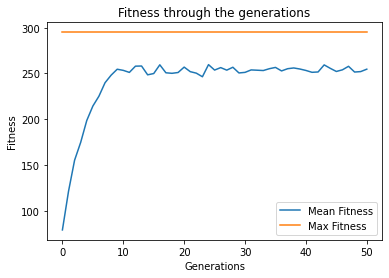

(51, 1000)


In [8]:
fitness_history_mean = [np.mean(fitness) for fitness in fitness_history]
fitness_history_max = [np.max(fitness) for fitness in fitness_history]
plt.plot(list(range(num_generations)), fitness_history_mean, label = 'Mean Fitness')
plt.plot(list(range(num_generations)), fitness_history_max, label = 'Max Fitness')
plt.legend()
plt.title('Fitness through the generations')
plt.xlabel('Generations')
plt.ylabel('Fitness')
plt.show()
print(np.asarray(fitness_history).shape)